# Ethereum Fraud Detection Using Machine Learning EDA

In this Project, Ethereum fraud is detected using Data Science and Machine Learning Technqiues. For this specific notebook, Exploratory Data Analysis is conducted to analyse the nature of the dataset and discover trends within the data.

Stages in this project involve:

- Exploratory Data Analysis (EDA)
- Data Preprocessing:
    - Filling missing values
    - Handling Outliers
    - Rebalancing
    - Normalisation
    - Data Train, Test Split
- Model Implementation 
- Model Evaluation
- Results Comparision

## Information about Dataset

The dataset used in this project is from Kaggle: https://www.kaggle.com/datasets/vagifa/ethereum-frauddetection-dataset/data


### About Dataset

#### Context  
This dataset contains rows of known fraud and valid transactions made over Ethereum, a type of cryptocurrency. This dataset is imbalanced.

#### Content  
Here is a description of the rows of the dataset:

- **Index**: the index number of a row
- **Address**: the address of the ethereum account
- **FLAG**: whether the transaction is fraud or not
- **Avg min between sent tnx**: Average time between sent transactions for account in minutes
- **Avg_min_between_received_tnx**: Average time between received transactions for account in minutes
- **Time_Diff_between_first_and_last(Mins)**: Time difference between the first and last transaction
- **Sent_tnx**: Total number of sent normal transactions
- **Received_tnx**: Total number of received normal transactions
- **Number_of_Created_Contracts**: Total Number of created contract transactions
- **Unique_Received_From_Addresses**: Total Unique addresses from which account received transactions
- **Unique_Sent_To_Addresses20**: Total Unique addresses from which account sent transactions
- **Min_Value_Received**: Minimum value in Ether ever received
- **Max_Value_Received**: Maximum value in Ether ever received
- **Avg_Value_Received** Average value in Ether ever received
- **Min_Val_Sent**: Minimum value of Ether ever sent
- **Max_Val_Sent**: Maximum value of Ether ever sent
- **Avg_Val_Sent**: Average value of Ether ever sent
- **Min_Value_Sent_To_Contract**: Minimum value of Ether sent to a contract
- **Max_Value_Sent_To_Contract**: Maximum value of Ether sent to a contract
- **Avg_Value_Sent_To_Contract**: Average value of Ether sent to contracts
- **Total_Transactions(Including_Tnx_to_Create_Contract)**: Total number of transactions
- **Total_Ether_Sent**:Total Ether sent for account address
- **Total_Ether_Received**: Total Ether received for account address
- **Total_Ether_Sent_Contracts**: Total Ether sent to Contract addresses
- **Total_Ether_Balance**: Total Ether Balance following enacted transactions
- **Total_ERC20_Tnxs**: Total number of ERC20 token transfer transactions
- **ERC20_Total_Ether_Received**: Total ERC20 token received transactions in Ether
- **ERC20_Total_Ether_Sent**: Total ERC20 token sent transactions in Ether
- **ERC20_Total_Ether_Sent_Contract**: Total ERC20 token transfer to other contracts in Ether
- **ERC20_Uniq_Sent_Addr**: Number of ERC20 token transactions sent to Unique account addresses
- **ERC20_Uniq_Rec_Addr**: Number of ERC20 token transactions received from Unique addresses
- **ERC20_Uniq_Rec_Contract_Addr**: Number of ERC20 token transactions received from Unique contract addresses
- **ERC20_Avg_Time_Between_Sent_Tnx**: Average time between ERC20 token sent transactions in minutes
- **ERC20_Avg_Time_Between_Rec_Tnx**: Average time between ERC20 token received transactions in minutes
- **ERC20_Avg_Time_Between_Contract_Tnx**: Average time ERC20 token between sent token transactions
- **ERC20_Min_Val_Rec**: Minimum value in Ether received from ERC20 token transactions for account
- **ERC20_Max_Val_Rec**: Maximum value in Ether received from ERC20 token transactions for account
- **ERC20_Avg_Val_Rec**: Average value in Ether received from ERC20 token transactions for account
- **ERC20_Min_Val_Sent**: Minimum value in Ether sent from ERC20 token transactions for account
- **ERC20_Max_Val_Sent**: Maximum value in Ether sent from ERC20 token transactions for account
- **ERC20_Avg_Val_Sent**: Average value in Ether sent from ERC20 token transactions for account
- **ERC20_Uniq_Sent_Token_Name**: Number of Unique ERC20 tokens transferred
- **ERC20_Uniq_Rec_Token_Name**: Number of Unique ERC20 tokens received
- **ERC20_Most_Sent_Token_Type**: Most sent token for account via ERC20 transaction
- **ERC20_Most_Rec_Token_Type**: Most received token for account via ERC20 transactions

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as py
import seaborn as sns

#### Loading Dataset

In [2]:
df = pd.read_csv('C:/Users/amber/Documents/Amber/Grind/Projects/Financial/Ethereum Fraud Detection/ethereum_transaction_dataset.csv')

df.head(5)

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [3]:
df.describe()

,Unnamed: 0,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,4920.000000,1815.049893,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,2840.996333,1222.621830,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,2460.000000,821.000000,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,4920.000000,1641.000000,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,7380.000000,2601.000000,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,9840.000000,4729.000000,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

#### Reformatting Column names spaces

In [5]:
df.columns = df.columns.str.lstrip()
df.columns = df.columns.str.replace(' ', '_')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed:_0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg_min_between_sent_tnx                              9841 non-null   float64
 5   Avg_min_between_received_tnx                          9841 non-null   float64
 6   Time_Diff_between_first_and_last_(Mins)               9841 non-null   float64
 7   Sent_tnx                                              9841 non-null   int64  
 8   Received_Tnx                                          9841

## Eploratory Data Analysis

<AxesSubplot:>

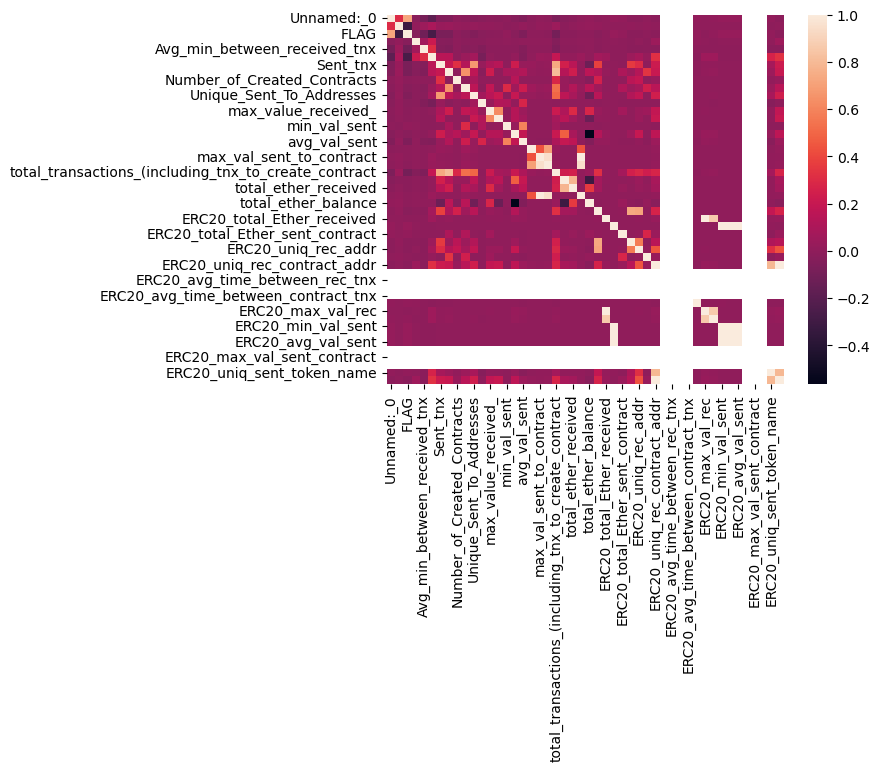

In [6]:
sns.heatmap(df.corr())

Text(0, 0.5, 'Count')

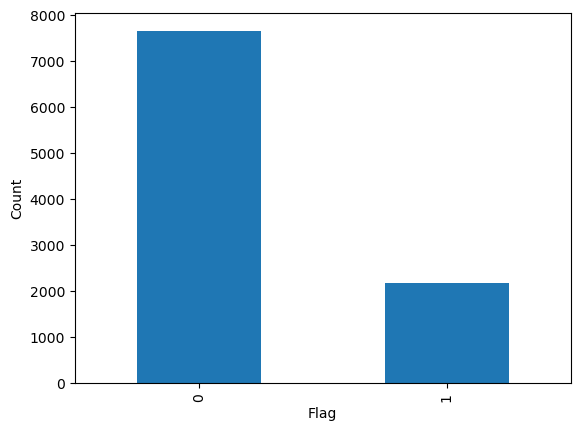

In [7]:
df['FLAG'].value_counts().plot(kind='bar')
plt.xlabel("Flag")
plt.ylabel("Count")

<AxesSubplot:xlabel='total_Ether_sent', ylabel='total_ether_received'>

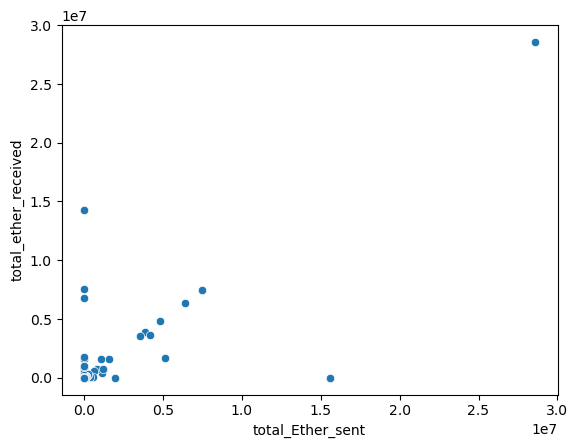

In [8]:
sns.scatterplot(data=df, x='total_Ether_sent', y='total_ether_received')

In [9]:
df['ERC20_most_sent_token_type'].value_counts()

0                                                         4399
None                                                      1856
                                                          1191
EOS                                                        138
OmiseGO                                                    137
                                                          ... 
Arcona Distribution Contract                                 1
HeroCoin                                                     1
Cindicator                                                   1
UnlimitedIP Token                                            1
eosDAC Community Owned EOS Block Producer ERC20 Tokens       1
Name: ERC20_most_sent_token_type, Length: 305, dtype: int64

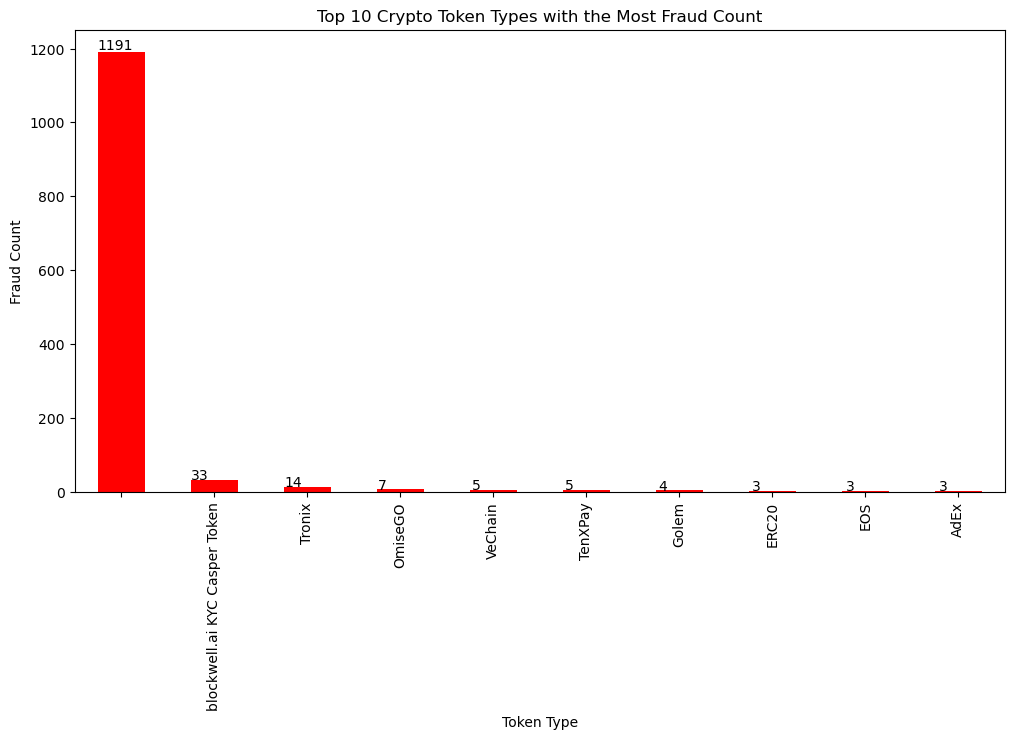

In [10]:
flagged = df.loc[df['FLAG']==1]

# Count the occurrences of each token type in flagged transactions
token_counts = flagged['ERC20_most_sent_token_type'].value_counts()

# Select the top 10 token types with the most flagged transactions
top_10_tokens = token_counts.head(10)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
ax = top_10_tokens.plot(kind='bar', color='red')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Adding title and labels
plt.title('Top 10 Crypto Token Types with the Most Fraud Count')
plt.xlabel('Token Type')
plt.ylabel('Fraud Count')

# Display the plot
plt.xticks(rotation=90)  # Rotate the x labels for better readability
plt.show()

<AxesSubplot:xlabel='total_Ether_sent', ylabel='FLAG'>

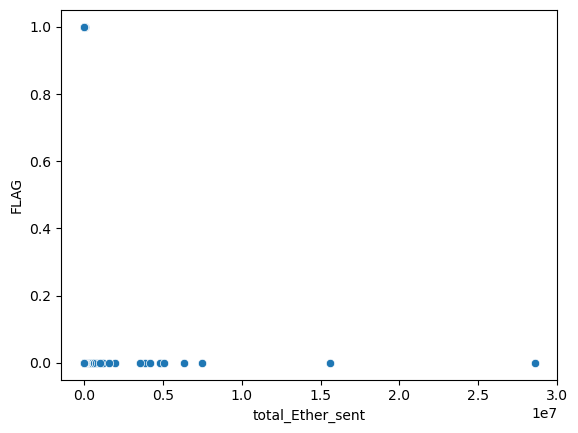

In [11]:
sns.scatterplot(data=df, x='total_Ether_sent', y='FLAG')

<AxesSubplot:xlabel='total_ether_received', ylabel='FLAG'>

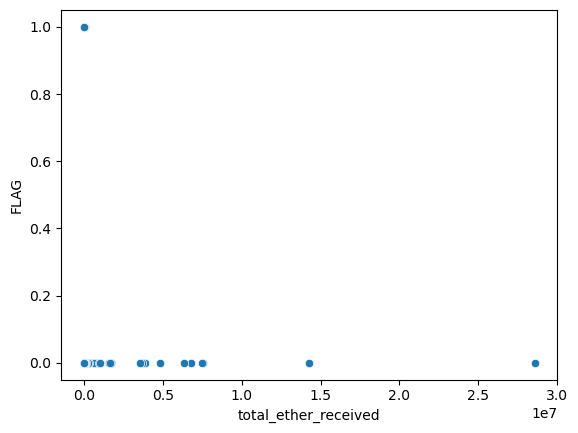

In [12]:
sns.scatterplot(data=df, x='total_ether_received', y='FLAG')

<AxesSubplot:xlabel='Avg_min_between_received_tnx', ylabel='FLAG'>

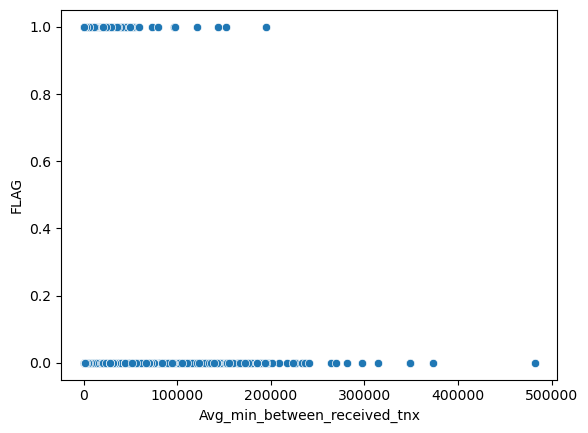

In [13]:
sns.scatterplot(data=df, x='Avg_min_between_received_tnx', y='FLAG')

<AxesSubplot:xlabel='Time_Diff_between_first_and_last_(Mins)', ylabel='FLAG'>

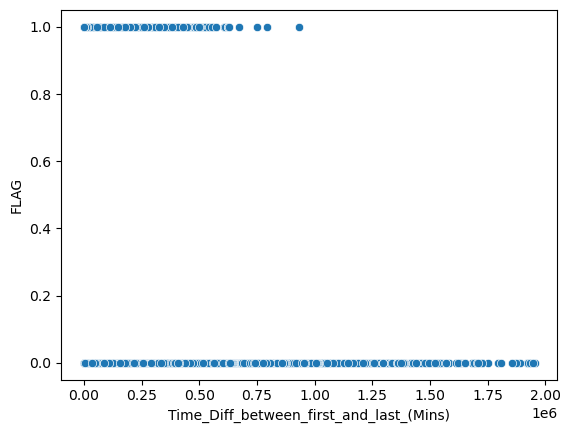

In [14]:
sns.scatterplot(data=df, x='Time_Diff_between_first_and_last_(Mins)', y='FLAG')

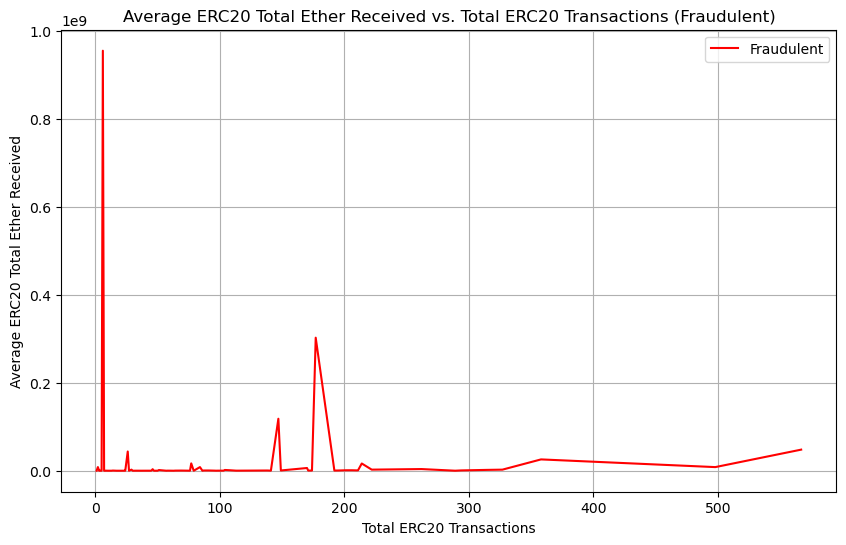

In [15]:
flagged = df.loc[df['FLAG']==1]
normal = df.loc[df['FLAG']==0]

avg_value_fraud = flagged.groupby('Total_ERC20_tnxs')['ERC20_total_Ether_received'].mean()
avg_value_normal = normal.groupby('Total_ERC20_tnxs')['ERC20_total_Ether_received'].mean()

# Plotting
plt.figure(figsize=(10, 6))

# Plot average value for flagged (fraudulent) transactions
plt.plot(avg_value_fraud.index, avg_value_fraud.values, label='Fraudulent', color='red')

# Adding title and labels
plt.title('Average ERC20 Total Ether Received vs. Total ERC20 Transactions (Fraudulent)')
plt.xlabel('Total ERC20 Transactions')
plt.ylabel('Average ERC20 Total Ether Received')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

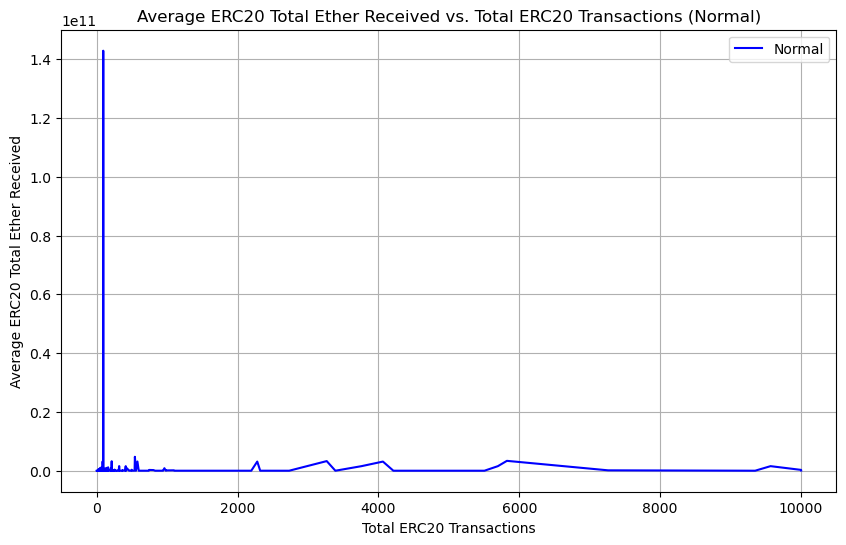

In [16]:
# Plotting
plt.figure(figsize=(10, 6))

# Plot average value for normal transactions
plt.plot(avg_value_normal.index, avg_value_normal.values, label='Normal', color='blue')

# Adding title and labels
plt.title('Average ERC20 Total Ether Received vs. Total ERC20 Transactions (Normal)')
plt.xlabel('Total ERC20 Transactions')
plt.ylabel('Average ERC20 Total Ether Received')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

<AxesSubplot:xlabel='Sent_tnx', ylabel='Received_Tnx'>

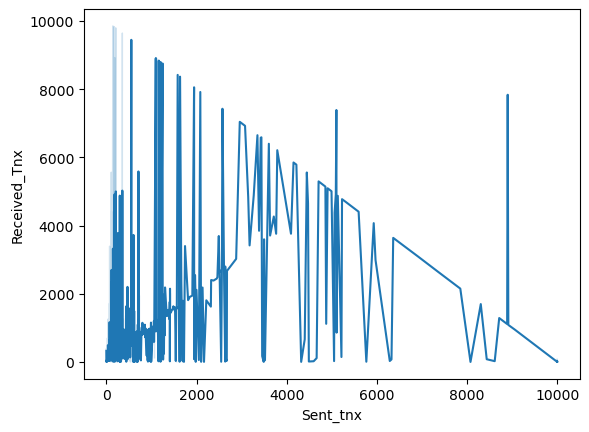

In [17]:
sns.lineplot(data=df, x='Sent_tnx', y='Received_Tnx')

In [18]:
avg_time_diff = df['Time_Diff_between_first_and_last_(Mins)'].groupby(df['FLAG']).mean()

print('Average Time Diif Transactions: ', avg_time_diff)

Average Time Diif Transactions:  FLAG
0    264718.257931
1     55230.057953
Name: Time_Diff_between_first_and_last_(Mins), dtype: float64
